In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Path = "/content/drive/My Drive/ice_cream.csv"

In [ ]:
df_ice_cream = pd.read_csv(Path)

In [ ]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [ ]:
df_ice_cream.rename(columns={"DATE": "date", "IPN31152N": "Production"}, inplace=True)

In [ ]:
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [ ]:
df_ice_cream.set_index('date', inplace=True)

In [ ]:
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [ ]:
df_ice_cream.head()

,Production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


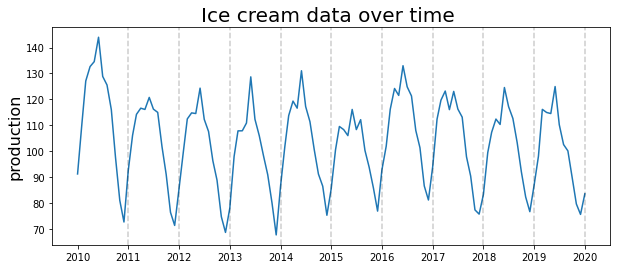

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.Production)
plt.title("Ice cream data over time ", fontsize = 20)
plt.ylabel("production" , fontsize = 16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha = 0.2)

**ACF** : Autocorrelation Function

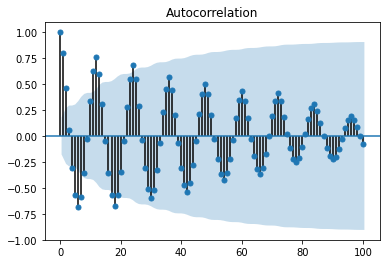

In [ ]:
acf_plot = plot_acf(df_ice_cream.Production, lags = 100)

The blue bars are error bands and are not statistically significant. So, after around year 30 all ACF values lies inside error band. Based on decaying ACF we are likely dealing with an Autoregressive process.

**PACF** 

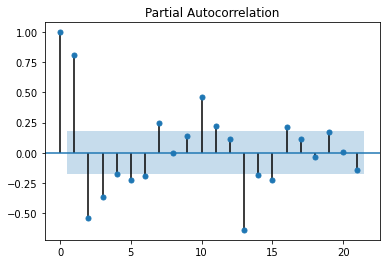

In [ ]:
pacf_plot = plot_pacf(df_ice_cream.Production)

Based on these PACF values we should start with Autoregressive model with lag 1, 2, 3 , 10, 13.